# **Random Forest**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org




# **Índice**

---

> [Random Forest](#scrollTo=xj3Td2DKv3sQ)
<br>
>>
>> [1 - Introducción a los Algoritmos Ensamblados](#scrollTo=UIJgdTfzv5OW)
>>
>> [2 - Random Forest](#scrollTo=Eu_hXazuv5Rv)
>>> [2.1. Proceso de Construcción del Modelo](#scrollTo=ERP63H5Hv5Us) \\
>>> [2.2. Proceso de Utilización del Modelo](#scrollTo=tbjDyXS_HlUp) \\
>>> [2.3. Clasificación](#scrollTo=94j6xNJOYiuH) \\
>>> [2.4. Regresión](#scrollTo=y64JsQhz-xOx)
>>
>> [3 - Importancia de las Variables](#scrollTo=-H0LQxU2RBtN)
>>
>> [4 - Parametrización](#scrollTo=MRdE3GSKlNui)
>>> [4.1. Número de Estimadores](#scrollTo=4xvgrMf_lVP9) \\
>>> [4.2. Número Máximo de Características](#scrollTo=hcH-MNAMpRSh) \\
>>> [4.3. Profundidad Máxima](#scrollTo=MxXaY1K_mub9) \\
>>> [4.4. Impureza/Error](#scrollTo=Cz5nf8HNnXTA)
>>
>> [5 - Ventajas y Desventajas](#scrollTo=E6Yrm8z_xkXy)
>>
>> [Actividad: Clasificación de imágenes de artículos de Zalando (*Fashion-MNIST*)](#scrollTo=On_oheRmOGe6)
>>> [Solución](#scrollTo=M5sa0-FxOIVk)
>>
>> [IDEAS CLAVE](#scrollTo=PsIrbjd0Lffb)

<br>

< [Naïve Bayes]() |
[Gradient Boosting]() >

# **1. Introducción a los Algoritmos Ensamblados**

En el primer tema vimos los árboles de decisión, uno de los modelos de aprendizaje automático más utilizados en problemas de clasificación y regresión. Son estructuras jerárquicas que se pueden utilizar para tomar decisiones basadas en una serie de preguntas o condiciones sobre las características de los datos de entrada. Los árboles de decisión son atractivos porque son interpretables y se pueden visualizar fácilmente. Por ello, los árboles de decisión son una base importante en la construcción de algoritmos ensamblados, ya que a menudo utilizan árboles de decisión como modelos base para la construcción de ensamblajes más complejos y precisos.

Los algoritmos ensamblados son técnicas avanzadas que combinan múltiples modelos de aprendizaje automático para mejorar la precisión y el rendimiento de las predicciones, aprovechando la idea de que la combinación de varios modelos puede resultar en un mejor rendimiento que el uso de un solo modelo. Los algoritmos ensamblados se basan en la premisa de que la combinación de varios modelos puede mitigar las debilidades individuales de cada modelo y aprovechar sus fortalezas para mejorar la precisión de las predicciones. El objetivo principal pues de ensamblar algoritmos es reducir el sesgo y la varianza inherentes en los modelos individuales y mejorar así la capacidad de generalización del modelo final.

Los modelos individuales utilizados en un ensamblaje pueden ser de diferentes tipos, como árboles de decisión, redes neuronales, máquinas de vectores de soporte, entre otros. Además, los algoritmos ensamblados pueden tener diferentes enfoques, dependiendo de como se combinen los modelos individuales, pudiéndose clasificar en dos categorías principales:

* Algoritmos ensamblados en **serie**: En este enfoque, los modelos individuales se entrenan secuencialmente, y la salida de un modelo se utiliza como entrada para el siguiente modelo en la secuencia. Por lo tanto, la predicción de un modelo se basa en la predicción del modelo anterior en la secuencia. Ejemplos de algoritmos ensamblados en serie incluyen el apilamiento (*stacking*) y la cascada (*cascade*) de modelos. Ejemplos de algoritmos ensamblados en serie son ***AdaBoost*** y ***GradientBoosting***, que veremos en los próximos temas.

>* **Apilamiento (*stacking*)**: En el apilamiento, los modelos individuales se entrenan en un conjunto de datos y sus predicciones se utilizan como características de entrada para un modelo meta o de nivel superior que realiza la predicción final. Este enfoque permite aprovechar las predicciones de múltiples modelos para mejorar la precisión y generalización del modelo final.

>* **Cascada (*cascade*)**: En la cascada, los modelos se entrenan en orden jerárquico, donde el modelo siguiente en la secuencia se entrena con los errores de predicción del modelo anterior. Esto permite que los modelos posteriores se enfoquen en corregir los errores del modelo anterior, lo que puede mejorar la precisión y robustez del ensamblaje.

>* **Aumento (*boosting*)**: Los modelos se construyen uno tras otro, y la salida de un modelo se utiliza para corregir los errores de predicción del modelo anterior. En cada iteración del proceso de boosting, se da mayor peso a los ejemplos de entrenamiento que se clasificaron incorrectamente por los modelos anteriores, lo que permite que los modelos posteriores se enfoquen en corregir los errores del modelo anterior. Esto crea una dependencia secuencial entre los modelos, ya que la salida de un modelo se utiliza para actualizar los pesos de los ejemplos de entrenamiento y luego se utiliza para entrenar el siguiente modelo en la secuencia.


* Algoritmos ensamblados en **paralelo**: En este enfoque, los modelos individuales se entrenan de forma independiente y las predicciones de todos los modelos se combinan para obtener la predicción final. Esto se puede hacer mediante la votación (*voting*) o el promedio (*averaging*) de las predicciones de los modelos individuales. Un ejemplo de algoritmo ensamblado en paralelo es ***Random Forest***, que veremos a continuación.

> * **Votación (*voting*)**: En la votación, la predicción final se obtiene mediante la mayoría de votos de los modelos individuales. Por ejemplo, en un problema de clasificación, si la mayoría de los modelos predicen una clase en particular, esa clase se selecciona como la predicción final.

>* **Promedio (*averaging*)**: En el promedio, las predicciones de los modelos individuales se promedian para obtener la predicción final. Esto puede ser útil en problemas de regresión, donde se promedian las predicciones numéricas de los modelos individuales para obtener una predicción final más precisa.

>* **Embasado (*bagging*)**: Se crean múltiples muestras *bootstrap* (subconjuntos aleatorios) del conjunto de entrenamiento original, y se entrena un modelo base en cada muestra de forma independiente y simultánea. Luego, las predicciones de estos modelos base se combinan mediante votación o promedio para obtener la predicción final del ensamblaje.


Los algoritmos ensamblados son ampliamente utilizados en la práctica en todo tipos de tareas tanto de clasificación como de regresión, detección de anomalías o recomendación, entre otros, y han demostrado ser efectivos para mejorar la precisión y robustez de los modelos de aprendizaje automático. Sin embargo, también presentan desafíos en términos de complejidad computacional, interpretación y selección de modelos, así como en la gestión de conjuntos de datos desequilibrados. Por lo tanto, es importante comprender los conceptos y técnicas relacionadas con los algoritmos ensamblados para aplicarlos adecuadamente en la práctica del aprendizaje automático.





# **2. Random Forest**


*Random Forest* es un algoritmo de aprendizaje supervisado ampliamente utilizado en el campo del aprendizaje automático, demostrando ser efectivo en una amplia gama de aplicaciones y problemas tanto de clasificación como de regresión. Es una técnica de ensamblado que combina múltiples árboles de decisión para mejorar la precisión y la robustez del modelo.

La idea central de Random Forest es construir un conjunto de árboles de decisión, donde cada árbol se entrena con una muestra aleatoria del conjunto de datos de entrenamiento (***bagging***). Estas muestras se obtienen utilizando un proceso llamado **muestreo *bootstrap***, que implica seleccionar aleatoriamente instancias del conjunto de entrenamiento con reemplazo, lo que significa que una misma instancia puede aparecer múltiples veces o incluso no aparecer en una muestra en particular. Además, en cada nodo de los árboles de decisión, se selecciona un subconjunto aleatorio de características del conjunto de características totales para dividir el nodo, lo que introduce un elemento adicional de aleatoriedad.

Una vez que se construyen todos los árboles en el bosque, las predicciones se obtienen combinando las salidas de los árboles, ya sea mediante votación (en el caso de clasificación) o promediando (en el caso de regresión), para obtener la predicción final del ensamblaje.

Una de las ventajas de Random Forest es que tiende a tener una mayor precisión y una mayor capacidad de generalización en comparación con un solo árbol de decisión, debido a la combinación de múltiples modelos y la aleatoriedad introducida durante el proceso de entrenamiento. Además, Random Forest es menos propenso al sobreajuste y es capaz de manejar datos con ruido y alta dimensionalidad.


<br>
<p><mark>RECUERDA </mark></p>
<hr>

En Scikit Learn somos capaces, mediante el uso de sus parámetros, de podar en profundidad ("max_depth", "min_samples_split" y otras) y de elegir el número de variables predictoras ("max_features").  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html





## **2.1. Proceso de Construcción del Modelo**

La construcción del modelo Random Forest se basa en los siguientes pasos (algunos de ellos comunes a la construcción de cualquier algoritmos de aprendizaje):

* **Preparación de los datos**: Este es un paso común en cualquier problema de aprendizaje automático y consiste en la carga y preparación adecuada de los datos de entrenamiento, que incluye la limpieza, la normalización o escalado de características, y la división del conjunto de datos en conjuntos de entrenamiento y prueba (se recomienda repasar el tema introductorio así como el de árboles de decisión).

* **Creación de muestras *bootstrap***: Se crea una serie de muestras *bootstrap* del conjunto de entrenamiento. Supononiendo un dataset de entrenamiento de $N$ filas, se generarán muestras aleatorias de $n$ filas (con $n \leq N$). Generalmente se suele comenzar con un valor de $n=N$. Puesto que la selección aleatoria se realiza con reemplazo, una misma instancia puede aparecer múltiples veces o incluso no aparecer en una muestra en particular. En este paso se preparan las muestras de entrenamiento para cada árbol del Random Forest.

* **Construcción de árboles de decisión**: Se construye un árbol de decisión para cada muestra *bootstrap* creada en el paso anterior, entrenando así cada árbol con su respectiva muestra. Además, se realiza una selección aleatoria de características (variables o *features*) para dividir los nodos del árbol (columnas del conjunto de datos). Los árboles se construyen de forma independiente y simultánea, lo que permite que el proceso sea paralelizable. Un parámetro importante a decidir aquí es el número de árboles de decisión que deseamos incorporar en el ensamblado, donde trataremos de equilibrar entre un número muy alto que implicará mejor rendimiento del modelo a costa de mayor tiempo de entrenamiento y mayor riesgo de sobreajuste. Un valor típico para empezar suele ser 100.

* **Combinación de predicciones**: Una vez que todos los árboles del *Random Forest* han sido construidos, las predicciones se obtienen combinando las salidas de los árboles. En el caso de clasificación, se puede utilizar la votación para determinar la clase predicha final, donde se elige la clase que obtiene la mayoría de votos entre los árboles. En el caso de regresión, se puede promediar las salidas de los árboles para obtener la predicción final del ensamblaje.


* **Evaluación y ajuste del modelo**: Al igual que en cualquier algoritmo de aprendizaje, se debe evaluar la precisión y el rendimiento utilizando el conjunto de prueba. Si es necesario, se pueden realizar ajustes en los hiperparámetros del modelo, como el número de árboles en el bosque, la profundidad de los árboles, o la cantidad de características seleccionadas aleatoriamente en cada nodo, para obtener un mejor rendimiento del modelo.

* **Utilización del modelo**: Una vez que se ha ajustado el modelo, se puede utilizar para hacer predicciones en nuevos datos.

A continuación se puede ver gráficamente el proceso de construcción del ensamblado, desde la selección aleatoria mediante *bootstrapping* hasta la agregación de resultados:

![Bootstrapping](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/1024px-Ensemble_Bagging.svg.png)

*Fuente: en.wikipedia.org*

## **2.2. Proceso de Utilización del Modelo**

El funcionamiento del modelo a la hora de predecir una nueva instancia es similar al de los árboles de decisión, pero con algunas particularidades para hacer uso de los diferentes árboles construidos y la combinación posterior de sus resultados:

1. Cuando llega la instancia, con sus $K$ variables predictoras $X_0, X_1, ..., X_k$ se ejecuta su predicción en los $n$ árboles de decisión al mismo tiempo )(en paralelo).
2. En cada uno de los árboles de decisión, el recorrido que realiza la instancia es diferente ya que cada árbol es diferente a los demás, tanto en profundidad, como en las variables (características o *features*) que tiene en consideración.
3. Por regla general, los árboles de decisión son de poca profundidad, con lo que la clasificación se lleva a cabo rápidamente.
4. La combinación de los resultados, como hemos visto, se puede realizar por diferentes métodos, como el votador mayoritario.

## **2.3. Clasificación**

Como hemos visto, *Random Forest* se basa en la idea de construir múltiples árboles de decisión y combinar sus predicciones para mejorar la precisión y robustez del modelo. Para ello, se construyen múltiples árboles de decisión, donde cada árbol se entrena con el subconjunto de muestras seleccionado y un subconjunto aleatorio de características en cada división del árbol. Para la predicción, cada árbol realiza una predicción basada en las características de entrada, y las predicciones de todos los árboles se combinan mediante votación mayoritaria para obtener la clase final asignada a la muestra de entrada.

Cuando la votación se realiza por voto ponderado mediante la probabilidad de cada clase en los diferenes árboles de decisión, obtenemos para cada clase:

$$class^0 = \frac{proba_1^0+proba_2^0+...+proba_n^0}{n}$$

$$class^1 = \frac{proba_{1}^1+proba_{2}^1+...+proba_n^1}{n}$$

$$...$$

$$class^{k-1} = \frac{proba_{1}^{k-1}+proba_{2}^{k-1}+...+proba_n^{k-1}}{n}$$

donde:

> $class^i$ es el resultado de la media de las probabilidades de que el resultado sea clase=i de cada árbol de decisión, para $i \in [0,k-1]$.

La clase con mayor probabilidad será la clase resultante de la predicción de *Random Forest*.





**Ejemplo en Python**

Preparamos el entorno cargando las librerías necesarias

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

Creamos artificialmente un conjunto de observaciones en dos dimensiones y las representamos gráficamente.

Se recomienda jugar con los parámetros *n_samples* y *noise* y observar su efecto en el modelo resultante.

In [69]:
n_samples=1000
noise=0.3

X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
print (X.shape)
print (y.shape)

(1000, 2)
(1000,)


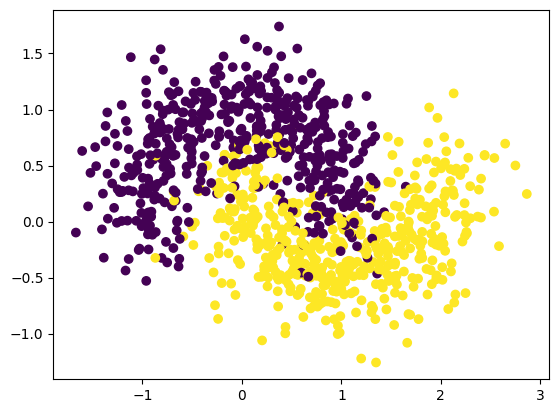

In [70]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

Hacemos un split del conjunto de datos en 70% para entrenamiento y 30% para evaluación.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3 )
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(700, 2) (700,)
(300, 2) (300,)


In [72]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

350
350
150
150


Creamos un clasificador basado en Random Forest donde limitamos la profundidad máxima de los árboles (*max_depth*), el número de árboles/estimadores (*n_estimators*) y el porcentaje de ejemplos utilizados para entrenar cada árbol (*max_samples*).

Se recomienda jugar con los parámetros *n_estimators*, *max_samples* y *max_depth* y observar su efecto en el modelo resultante.

In [73]:
n_estimators=5
max_samples=0.5
max_depth=2

rf_model = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_samples=max_samples, max_depth=max_depth)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 85.71
Precisión sobre los datos de test: 91.00


Veámos los resultados con mayor detalle, analizando la matriz de confusión y las diferentes métricas de evaluación:

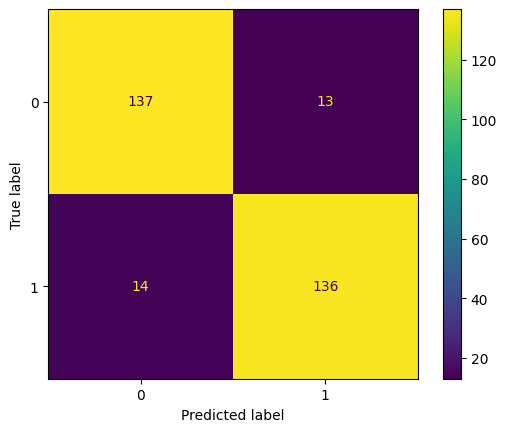

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Para refrescar, calculemos las métricas de evaluación siguiendo las fórmulas del Tema 1:

In [75]:
a = cm[0,0]
b=cm[0,1]
c=cm[1,0]
d=cm[1,1]

TP=d/(c+d)
FP=b/(a+b)
TN=a/(a+b)
FN=c/(c+d)

accuracy = (a+d)/(a+b+c+d)
error = 1-accuracy
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F=2*(precision*recall)/(precision+recall)

print("TP: ", round(TP,4))
print("TN: ", round(TN,4))
print("FP: ", round(FP,4))
print("FN: ", round(FN,4))

print("Accuracy: ", round(accuracy,4))
print("Error: ", round(error,4))
print("Precision: ", round(precision,4))
print("Recall: ", round(recall,4))
print("F-meassure: ", round(F,4))

TP:  0.9067
TN:  0.9133
FP:  0.0867
FN:  0.0933
Accuracy:  0.91
Error:  0.09
Precision:  0.9128
Recall:  0.9067
F-meassure:  0.9097


O bien utilicemos el reporte de clasificación de Python, que nos debería dar los mismos resultados (además de las métricas por clase):

In [76]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, pred_test)}")

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.91      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Veámos las probabilidades en la predicción de las clases en un árbol de decisión determinado (parámetro *tree_number*):

In [77]:
tree_number=0
rf_model.estimators_[tree_number].predict_proba(X_test)[0:5]

array([[0.45555556, 0.54444444],
       [0.05128205, 0.94871795],
       [0.45555556, 0.54444444],
       [0.45555556, 0.54444444],
       [0.45555556, 0.54444444]])

<br>
<p><mark>RECUERDA </mark></p>
<hr>
Cuando llamamos a la función *predict_proba* devuelve tantas probabilidades como clases haya en el conjunto de datos. En el caso de un problema binario tendremos dos probabilidades por cada árbol de decisión. Para un árbol de decisión $i$ cualquiera ensamblado en el *Random Forest*,tendremos:

$[proba_i^0, proba_i^1]$

Visualicemos el árbol de decisión anterior:

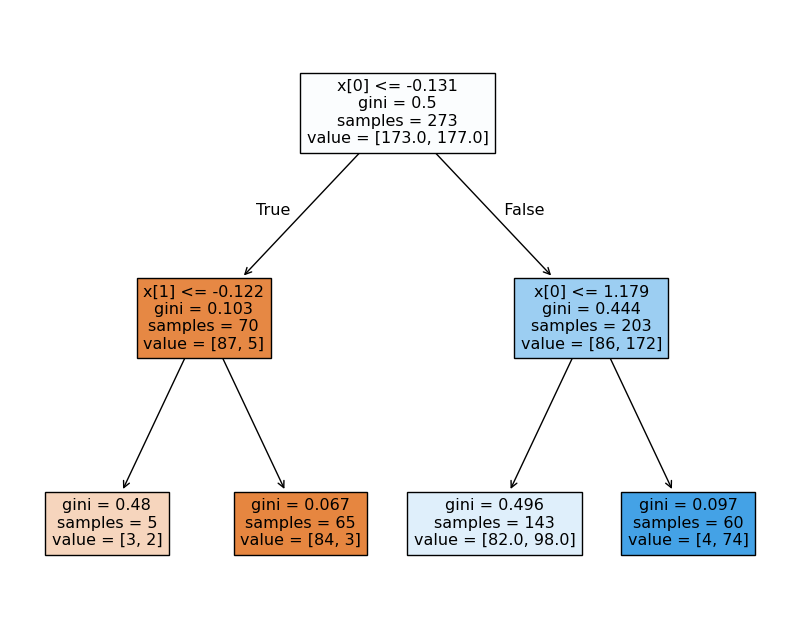

In [78]:
from sklearn.tree import plot_tree, export_graphviz
plt.figure(figsize=(10,8))
plot_tree(rf_model.estimators_[tree_number], filled=True, max_depth=2)
plt.show()

Graficamos las fronteras de decisión (*boundaries*), entendida como la frontera entre las diferentes clases generadas por el modelo, con el objetivo de ver cómo reacciona el modelo ante cambios en sus parámetros.

Como es esperable, cuanto mayor es el número de árboles de decisión más suave se vuelve la frontera de decisión.

In [79]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, title):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest,
                cmap=plt.cm.RdYlBu, edgecolor='black'
                )

    plt.suptitle(title)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

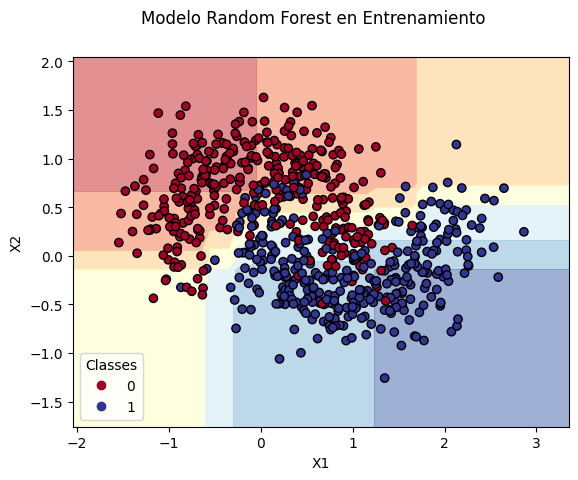

In [80]:
plot_boundaries_test(X_train, y_train, rf_model, True, X_train, y_train, "Modelo Random Forest en Entrenamiento")

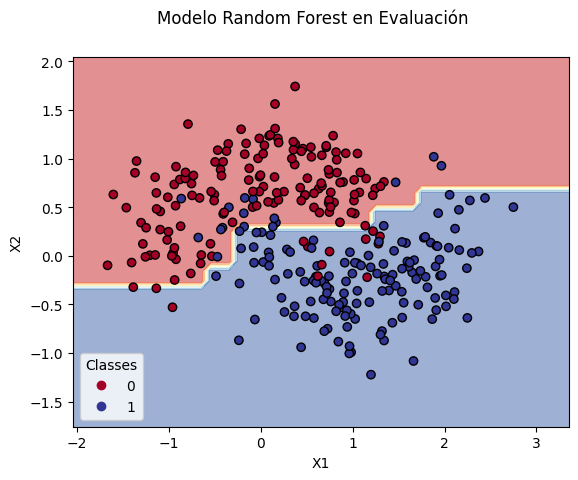

In [81]:
plot_boundaries_test(X_train, y_train, rf_model, False, X_test, y_test,"Modelo Random Forest en Evaluación")

Analicemos las fronteras cuando se genera el ensamblado con diferente número de árboles (parámetros *min* y *max*):

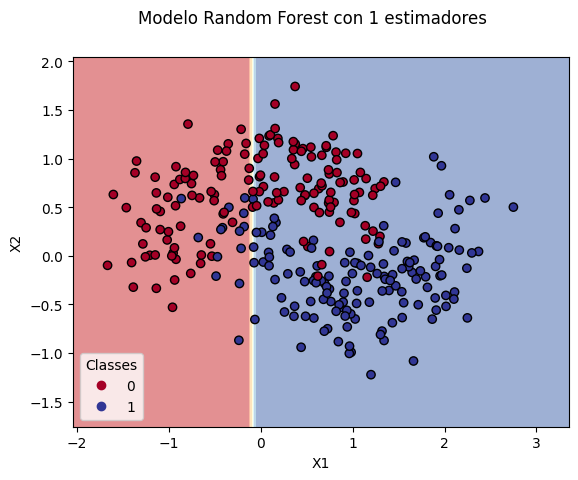

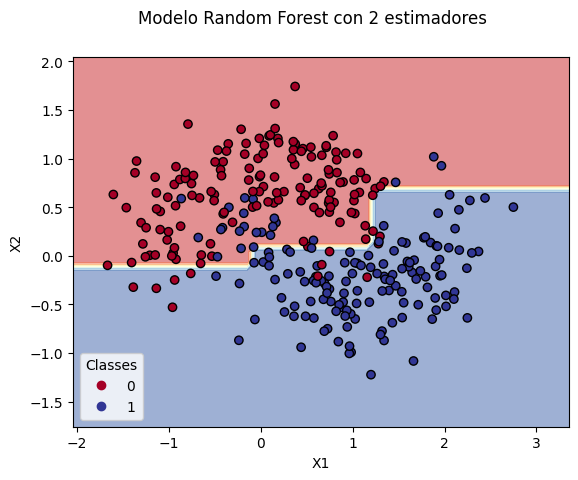

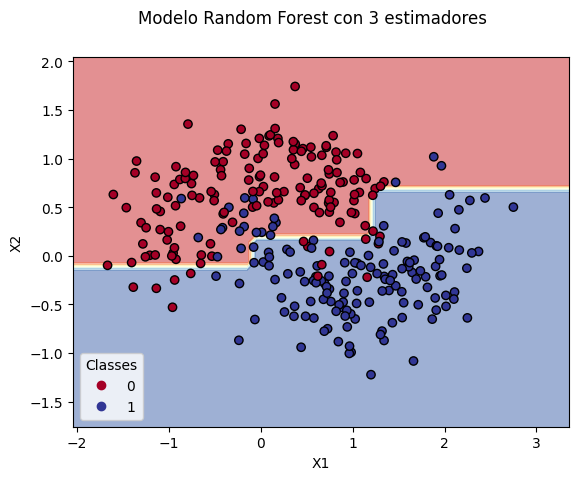

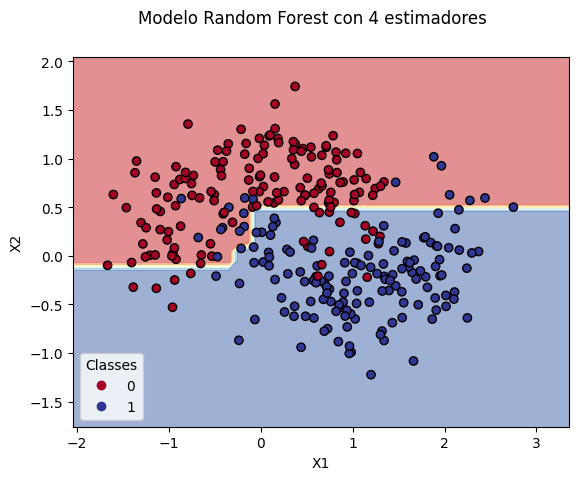

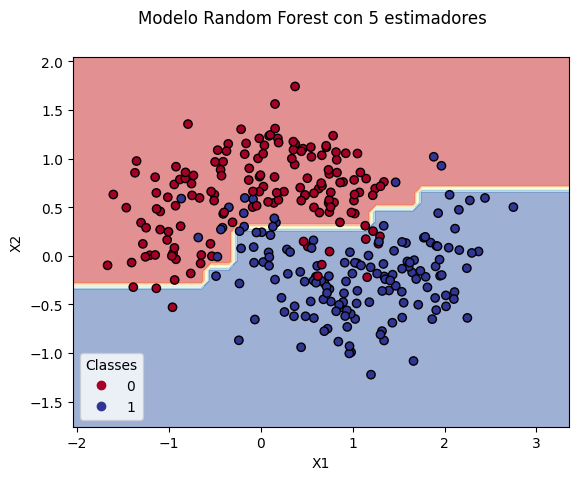

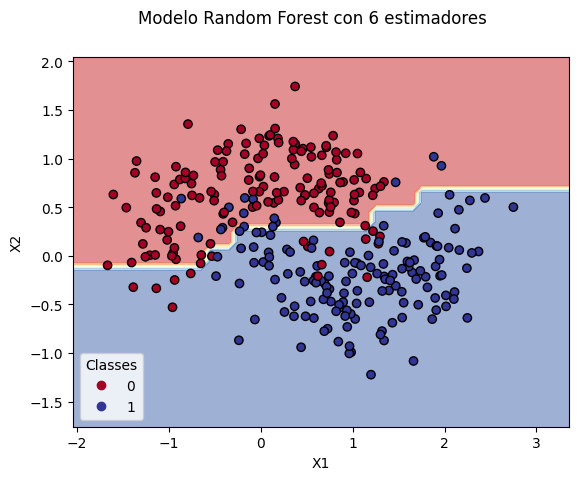

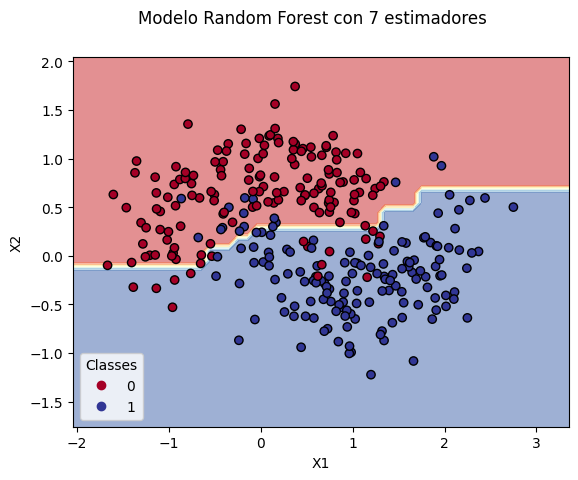

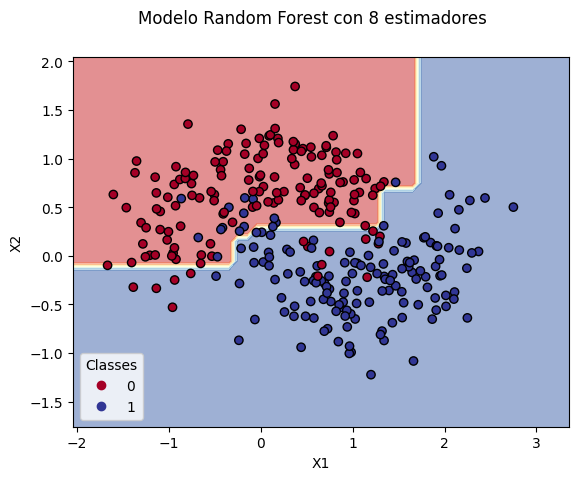

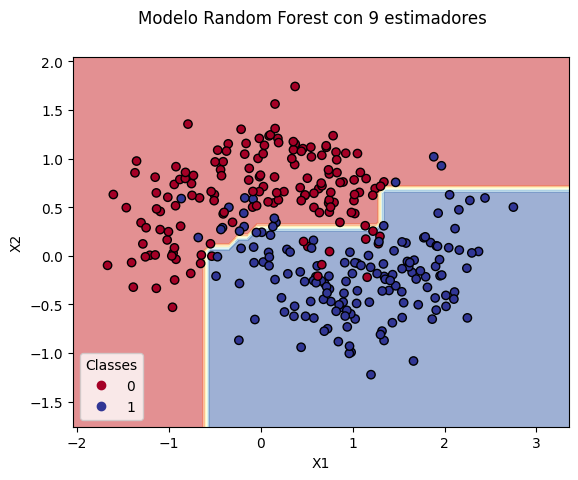

In [82]:
min=1
max=10

for n in range (min, max):
  rf_model = RandomForestClassifier(random_state=0, n_estimators=n, max_samples=0.5, max_depth=2)
  rf_model.fit(X_train, y_train)
  pred_train = rf_model.predict(X_train)
  pred_test = rf_model.predict(X_test)
  plot_boundaries_test(X_train, y_train, rf_model, False, X_test, y_test,f"Modelo Random Forest con {n} estimadores")

Veámos las fronteras de decisión de cada árbol de decisión del modelo (dado un número concreto de árboles definido en *n_estimators*) y la combinación final del *Random Forest*:

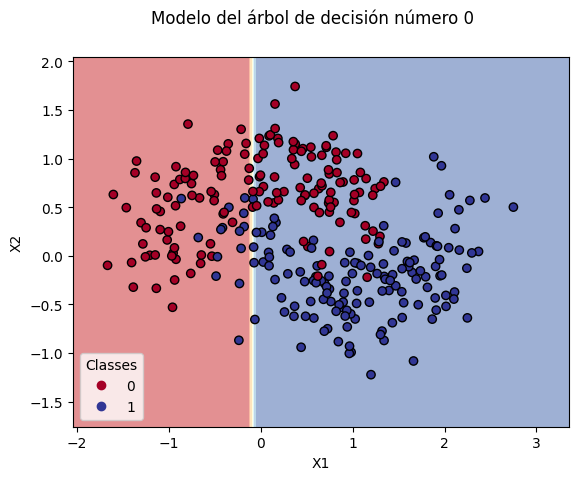

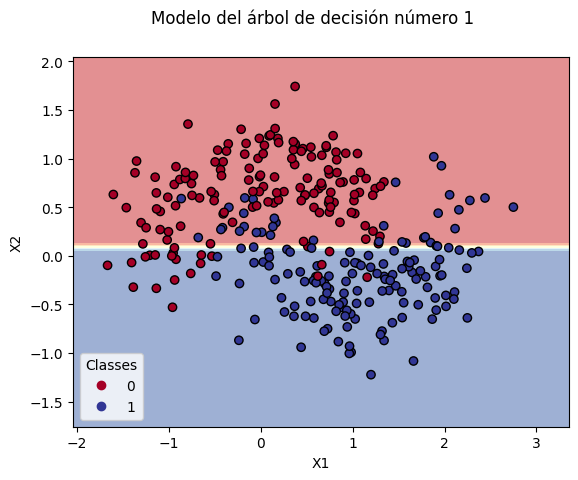

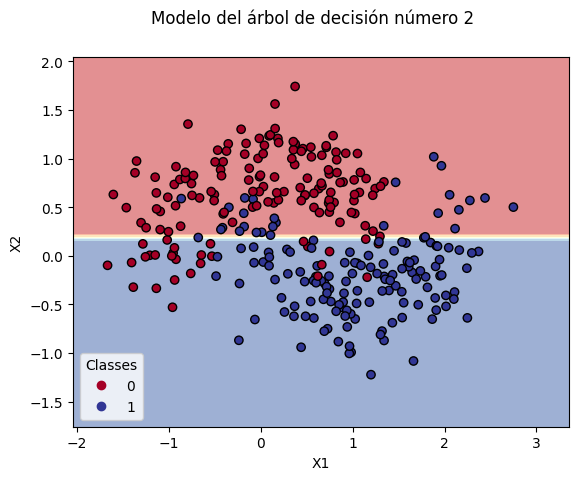

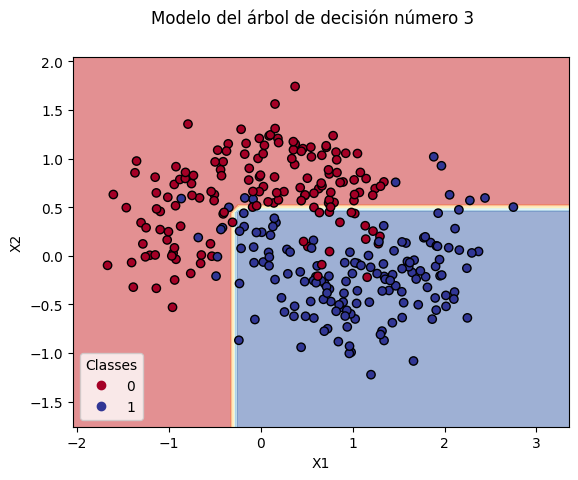

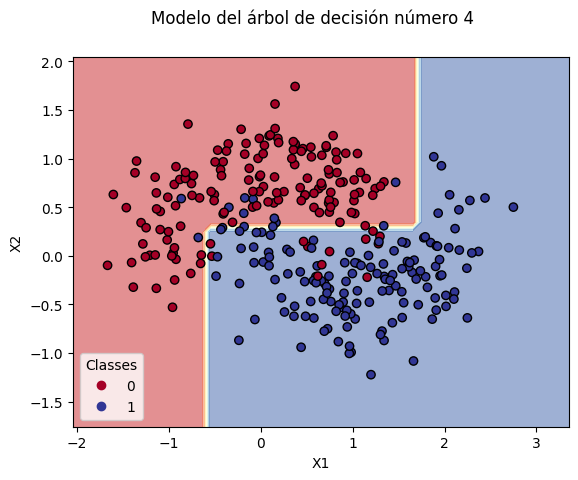

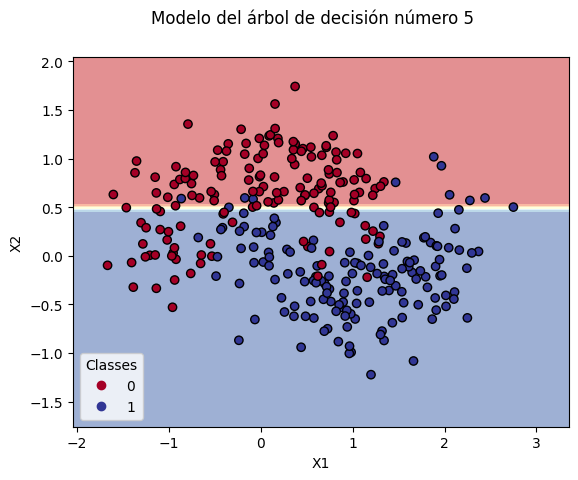

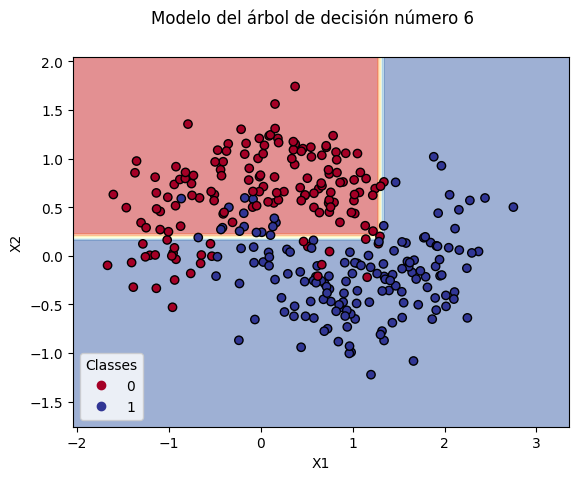

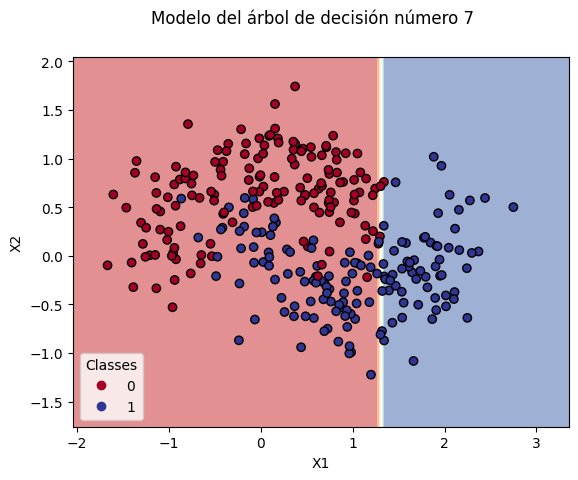

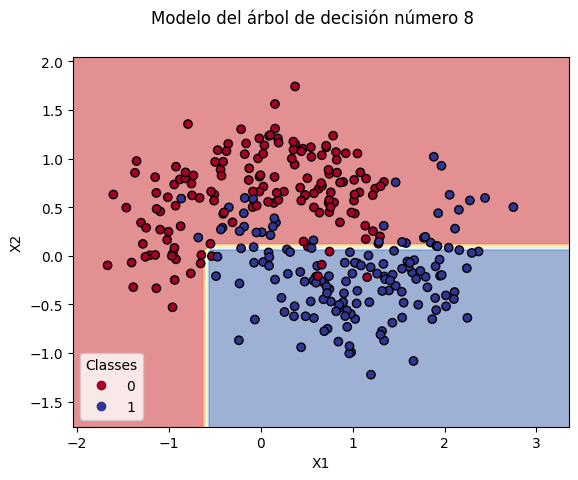

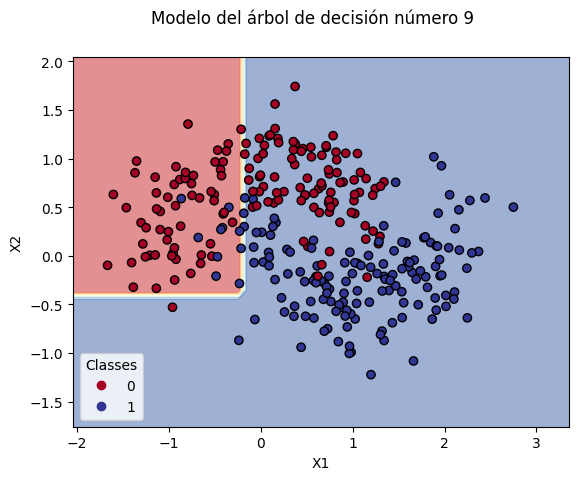

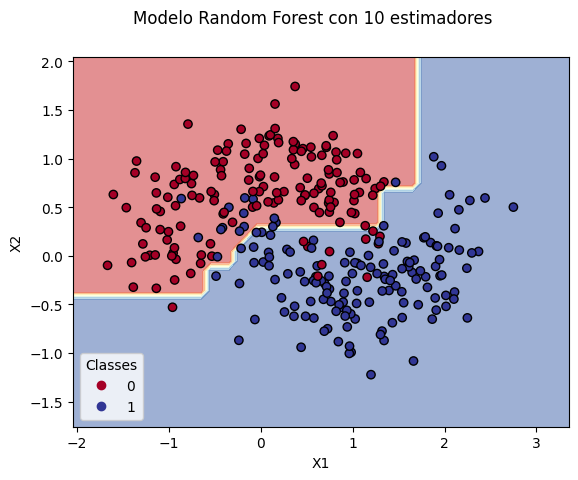

In [83]:
n_estimators=10

rf_model = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_samples=0.5, max_depth=2)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

for i in range(n_estimators):
  plot_boundaries_test(X_train, y_train, rf_model.estimators_[i], False, X_test, y_test,f"Modelo del árbol de decisión número {i}")

plot_boundaries_test(X_train, y_train, rf_model, False, X_test, y_test,f"Modelo Random Forest con {n_estimators} estimadores")

## **2.4. Regresión**

En el caso de la regresión, *Random Forest* construye un conjunto de árboles de decisión para predecir valores numéricos en lugar de etiquetas de clase.

La idea central detrás de *Random Forest* para regresión es similar a la de la clasificación: se construye un conjunto de árboles de decisión en paralelo, cada uno entrenado con una muestra aleatoria del conjunto de datos de entrenamiento. Luego, se promedian las predicciones de todos los árboles para obtener la predicción final.




Primero, preparamos el entorno cargando las librerías necesarias.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generamos de manera aleatoria un conjunto de ejemplos siguiendo una distribución Gausiana isotrópica (es decir, todos los puntos se extienden igual en todas las direcciones alrededor del centro). Por ello, introducimos un pequeño desplazamiento en las muestras para poder diferenciarlas visualmente y ver cómo afecta al clasificador.

Se recomienda jugar con los diferentes parámetros de generación de los datos para ver su impacto en los resultados.

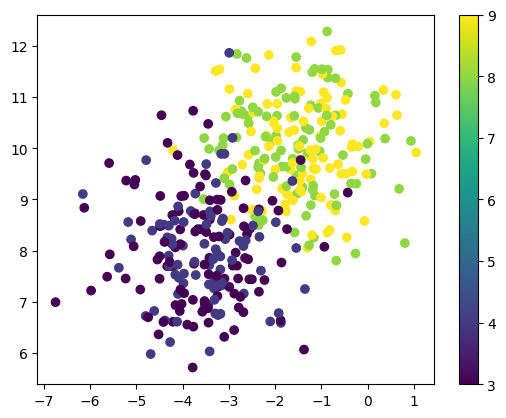

In [85]:
n_samples=400
centers=1

min_s_1=8     # Valor original 8
max_s_1=10    # Valor original 10
min_s_2=3     # Valor original 3
max_s_2=5     # Valor original 5

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=n_samples, random_state=42,centers=centers)
y[0:round(n_samples/2)] = np.random.randint(min_s_1, max_s_1, round(n_samples/2))
y[round(n_samples/2):n_samples] = np.random.randint(min_s_2, max_s_2, round(n_samples/2))
X[0:round(n_samples/2)] = X[0:round(n_samples/2)]+1
X[round(n_samples/2):n_samples] = X[round(n_samples/2):n_samples]-1
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.colorbar()
plt.show()

In [86]:
print(y.min())
print(y.max())
print(X.min())
print(X.max())

3
9
-6.750464963121823
12.284978986002717


Particionamos el conjunto de datos entre entrenamiento y validación siguiendo la proporción dada por el parámetro *test_size*.

In [87]:
test_size=0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size)

Cargamos las librerías necesarias para entrenar un regresor basado en Random Forest y evaluarlo con diferentes métricas.

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Entrenamos el modelo Random Forest.

Se recomienda jugar con los parámetros *n_estimators*, *max_samples* y *max_depth*.

0.7659845186044821


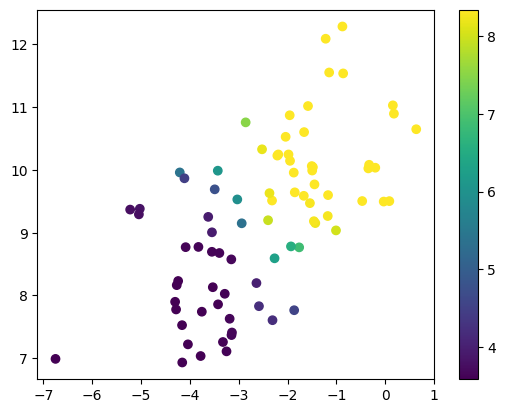

In [89]:
n_estimators=5
max_samples=0.5
max_depth=2

rf_model = RandomForestRegressor(n_estimators=100, max_samples=max_samples, max_depth=max_depth, random_state=0)
rf_model.fit(X, y)

y_pred = rf_model.predict(X_test)
print(r2_score(y_test,y_pred))

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.colorbar();

A diferencia de los modelos de clasificación, la regresión como hemos dicho se puede evaluar mediante diferentes métricas. Como resumen, aquí se muestra la evaluación del anterior modelo en base a cuatro de ellas: *MSA*, *MSE*, *RMSE*, y $r^2$:

In [90]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 0.860
Mean Squared Error (MSE): 1.581
Root Mean Squared Error (RMSE): 1.257
R-squared (R2): 0.766


Generamos el grafo asociado al árbol de decisión para analizar sus flujos y decisiones.


<br/>
<p><mark>TE RECOMIENDO</mark></p>
<hr/>

Calcular manualmente algún valor de *MSE* en los nodos del árbol para asentar conocimientos.

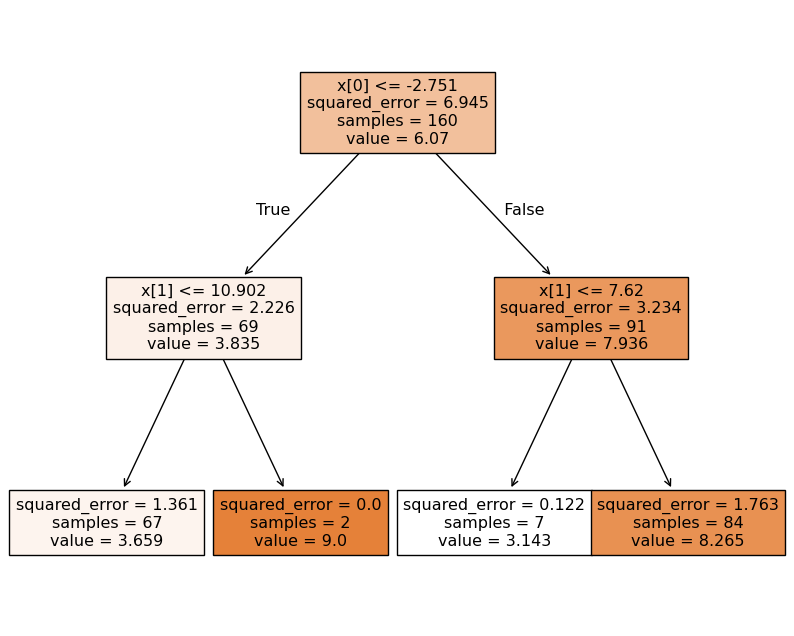

In [91]:
from sklearn.tree import plot_tree, export_graphviz
plt.figure(figsize=(10,8))
plot_tree(rf_model.estimators_[tree_number], filled=True, max_depth=2)
plt.show()

<br/>
<p><mark>RECUERDA</mark></p>
<hr/>

*Scikit Learn* nos permite conocer el resultado de cada árbol de decisión, con lo que podemos calcular otras métricas diferentes a la media para la predicción final.

Para acceder a la predicción de cada clasificador lo haremos de la siguiente manera:

```
rf_model.estimators_[tree_number].predict(X_test)
```

Donde:

> *tree_number* es el árbol para el que queremos conocer la predicción.


# **3. Importancia de las variables**

Como veíamos en el tema de árboles de decisión, una de sus principales características era que permitían conocer la importancia de cada una de las variables del modelo en la predicción.

Dado que Random Forest es un ensamblado de árboles de decisión también tiene la capacidad de darnos la importancia dada a cada una de las variables predictoras. Sin embargo, puesto que lleva a cabo una selección aleatoria de variables para la construcción de cada árbol de decisión, el número de variables con importancia puede ser mayor que en un árbol de decisión individual.

Para verlo en Python, al igual que con los árboles de decisión, utilizaríamos la siguiente sentencia:

```
rf_model.feature_importances_
```

Utilicemos aquí el conjunto de datos ***Wine*** del primer tema para obtener la importancia de las variables según *Random Forest*.


Cargamos el conjunto de datos *Wine* y creamos el *dataframe* necesario para su manejo:

In [92]:
from sklearn.datasets import load_wine
data = load_wine()

df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["class"])
df_all = pd.concat([df_features, df_target],axis=1)

Realizamos una división (*split*) del conjunto de datos entre entrenamiento y evaluación:

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values,
                                                    stratify=df_target.values,
                                                    random_state=42, test_size=0.3)

Generamos un modelo Random Forest para clasificación.

Se recomienda jugar con los parámetros *n_estimators*, *max_samples* y *max_depth* descritos anteriormente, así como con *max_features* que indica el número máximo de características a seleccionar por cada árbol.

In [94]:
n_estimators=5
max_samples=0.5
max_depth=2
max_features=5

rf_model = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_samples=max_samples, max_depth=max_depth, max_features=max_features)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 95.97
Precisión sobre los datos de test: 94.44


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mostramos la importancia de las variables:


In [95]:
rf_model.feature_importances_

array([0.        , 0.018868  , 0.        , 0.02297527, 0.        ,
       0.        , 0.18932137, 0.        , 0.        , 0.28380072,
       0.10723112, 0.10431266, 0.27349087])

Lo graficamos para una mejor comprensión:

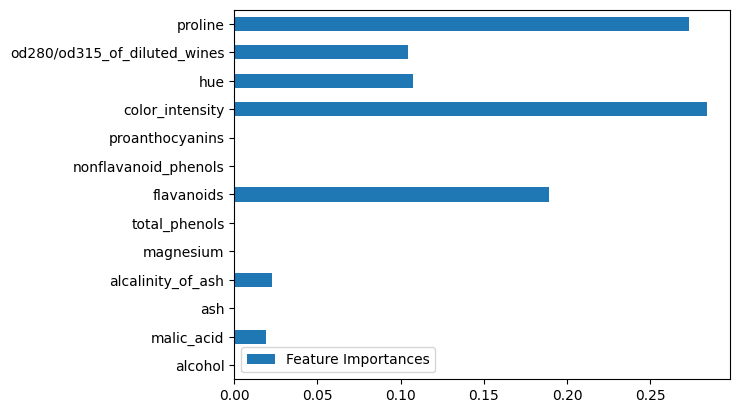

In [96]:
df_imp = pd.DataFrame(rf_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

<p><mark>RECUERDA </mark></p>
<hr>

Cuando se usó un sólo árbol de decisión, las tres variables con importancia mayor que cero fueron: *flavanoids*, *ash* y *color-intensity*. Esta vez han aparecido algunas más, siendo *proline* la que más importancia recibe.

Se puede ver cómo las dos variables con más importancia también dibujan un gráfico con las clases fácilmente diferenciables. Pero esta vez, la clasificación se puede hacer con un dibujo de fronteras de mejor calidad que con un sólo árbol de decisión.

<Axes: xlabel='proline', ylabel='flavanoids'>

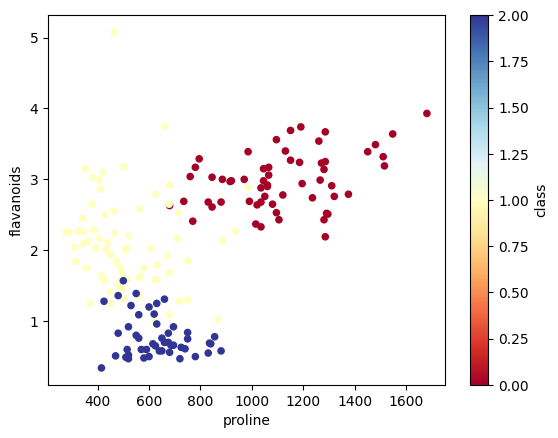

In [97]:
df_all.plot.scatter(x="proline", y="flavanoids", c="class", cmap=plt.cm.RdYlBu)

Como en anteriores temas, podemos indagar en los resultados mediante un análisis de la matriz de confusión o un reporte de la clasificación:

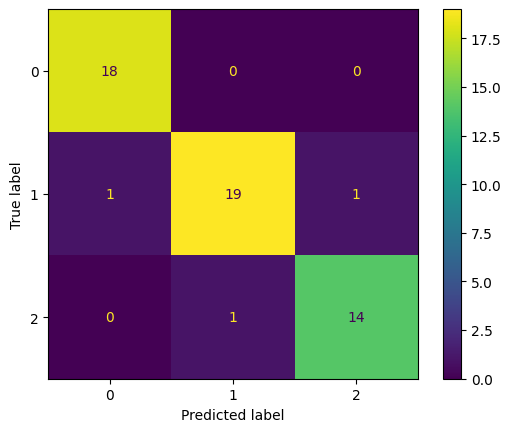

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [99]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, pred_test)}")

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.95      0.90      0.93        21
           2       0.93      0.93      0.93        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54



# **4. Parametrización**

Como hemos visto en los ejemplos, Random Forest permite parametrizar ciertos aspectos de su entrenamiento. Aquí se detallan los parámetros más importantes junto con el efecto que pueden tener en el proceso de entrenamiento y/o en el modelo resultante.

## **4.1. Número de Estimadores (*n_estimators*)**

El número de árboles de decisión (estimadores) utilizados en el modelo Random Forest tiene un impacto directo en la suavidad de las fronteras de decisión generadas. Es esperable que a mayor número de árboles las fronteras de decisión sean más suaves y por lo tanto el modelo sea más robusto y prevenga mejor el sobreajuste (uno de los problemas de los árboles de decisión, si nos remontamos al Tema 1).

Por otro lado, a mayor número de árboles, mayor la complejidad del modelo y por lo tanto, mayor el tiempo de entrenamiento necesario y la memoria necesaria para ello. La paralelización del proceso puede ayudar.

El número de árboles o estimadores se puede determinar mediante el parámetro *n_estimators*, que or defecto actualmente en *Scikit Learn* es de 100.


## **4.2. Número Máximo de Características (*max_features*)**

Como hemos visto, *Random Forest* permite una selección aleatoria de características (*features*) para construir cada uno de los árboles que componen el ensamblado. El parámetro *max_features* permite controlar este componente de la siguiente manera. Consideremos que el número total de variables predictoras es $F$:

* ***auto***: El valor por defecto del algoritmo. En clasificación consiste en el valor $\sqrt{F}$, mientras que en regresión es $F$, lo que significa que siempre usa todas las features (*Bagging* puro). Es recomendable cambiarlo a *sqrt*.
* ***sqrt***: El número de características será $\sqrt{F}$. En clasificación coincide con el valor por defecto *auto*.
* ***log2***: El número de características será $log_2(F)$.
* Si escribimos un **número entero**, éste será el máximo númreo de características utilizado.
* Si escribimos un **decimal entre 0 y 1**, éste representará el porcenaje de ejemplos que se utilizarán. Por ejemplo, si escribimos 0.5, se escogerán grupos con número máximo igual a la mitad del número de características.

Veámos cómo afecta este parámetro en el modelo final:

* **Si es igual al número de variables predictoras** (max_features = len(train.columns)), entonces no existe una selección aleatoria de columnas. Sólo se mantiene el *bootstrapping* de filas. Estaríamos hablando de un modelo de *Bagging* puro.

* **Si se trata de un número alto aunque no igual al número de variables predictoras** (max_features < len(train.columns)): en este caso, se pierde en parte la característica principal de *Random Forest* por la que se usan grupos diferentes en las decisiones. Podemos llegar a correr el riesgo de sobreajuste.

* **Si se trata de un número mucho más bajo que el número de variables predictoras** (max_features << len(train.columns)): los árboles de decisión se configuran con pocas variables y se hacen muy simples, pudiendo llegar a correr el riesgo de subajuste.

## **4.3. Profundidad Máxima (*max_depth*)**

Parametriza la profundidad máxima de los árboles de decisión. Recordando el primer tema, cunato mayor sea este número, más se ajustarán los árboles de decisión a los datos de entrenamiento, pudiendo producir sobreajuste.

Por otro lado, Random Forest funciona bien con árboles poco profundos ya que los combina en su predicción final, con lo que el problema del sobreajuste se minimiza.

Además, la utilización de variables predictoras aleatorias (parámetro anterior) ayuda a minimizar el peligro de sobreajuste.


## **4.4. Impureza/Error (*criterion*)**

Al igual que en los árboles de decisión, permite parametrizar la fórmula para el cálculo de la impureza en modelos de clasificación (*Gini* o *entropy*), o del error en modelos de regresión (*mse* o *mae*).


# **5. Ventajas y Desventajas**
**Ventajas**:

* **Precisión**: *Random Forest* es conocido por su alta precisión en la predicción de datos tanto en problemas de clasificación como de regresión. La combinación de múltiples árboles de decisión entrenados en muestras *bootstrap* y la votación o promedio de sus predicciones finales tiende a mejorar la precisión del modelo en comparación con un solo árbol de decisión.

* **Robustez**: *Random Forest* es resistente a datos ruidosos y a *overfitting*. La combinación de diferentes árboles entrenados en muestras *bootstrap* y la aleatoriedad en la selección de características para la división de nodos ayuda a reducir el riesgo de *overfitting* y a obtener un modelo más robusto que generaliza bien a datos no vistos.

* **Preprocesado y manejo de datos faltantes**: No precisan de ningún tipo de escalado en el preprocesado, puede trabajar con los valores tal cual están en el conjunto de datos. También puede manejar datos con valores faltantes de manera efectiva. Los árboles individuales pueden trabajar con datos incompletos, ya que las divisiones de nodos se basan en las características disponibles en cada nodo en particular.

* **Escalabilidad**: *Random Forest* es paralelizable, lo que significa que se puede aprovechar el poder de procesamiento de múltiples *CPU* o *GPU* para entrenar y construir árboles de decisión de forma más rápida en grandes conjuntos de datos. Esto lo hace adecuado para problemas con grandes cantidades de datos.

* **Interpretabilidad**: Aunque los árboles de decisión individuales en un *Random Forest* pueden no ser muy interpretables, el ensamblaje en sí mismo puede proporcionar una idea de la importancia relativa de diferentes características en la predicción del modelo.

**Desventajas**:

* **Complejidad**: *Random Forest* puede generar un gran número de árboles de decisión, lo que puede resultar en un modelo complejo y difícil de interpretar en comparación con un solo árbol de decisión. Además, la combinación de múltiples árboles puede aumentar el tiempo de entrenamiento y la complejidad computacional del modelo.

* **Espacio de almacenamiento**: El ensamblaje de múltiples árboles de decisión en un *Random Forest* puede requerir un mayor espacio de almacenamiento en comparación con un solo árbol de decisión, ya que se deben almacenar los modelos base individuales y los resultados de las predicciones para cada árbol.

* **Sensibilidad a hiperparámetros**: *Random Forest* tiene varios hiperparámetros que pueden afectar a su rendimiento, como el número de árboles en el bosque, la profundidad de los árboles, y la cantidad de características seleccionadas aleatoriamente en cada nodo. La elección adecuada de estos hiperparámetros puede requerir experimentación y ajuste para obtener el mejor rendimiento del modelo.

* **Interpretabilidad limitada**: Aunque *Random Forest* puede proporcionar una idea de la importancia relativa de las características en la predicción del modelo, la interpretación detallada de cómo se toman las decisiones en cada árbol individual puede ser difícil debido a la complejidad del ensamblaje y la aleatoriedad introducida en el proceso de construcción de los árboles.




# **Actividad Guiada. Clasificación de imágenes de artículos de Zalando (Fashion-MNIST)**

En esta actividad guiada con Random Forest vamos a aproximar un problema de clasificación de imágenes.

Fashion-MNIST (https://www.kaggle.com/datasets/zalando-research/fashionmnist) es un conjunto de datos de las imágenes de los artículos de Zalando (https://www.zalando.es/), que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de test de 10.000 ejemplos.

Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta con 10 clases. Zalando pretende que Fashion-MNIST sirva como un reemplazo directo del conjunto de datos MNIST original, dedicado al reconocimiento de dígitos escritos a mano. Comparte el mismo tamaño de imagen y estructura de divisiones de entrenamiento y test.

**Contenido**

Cada imagen tiene 28 píxeles de alto y 28 de ancho, para un total de 784 píxeles en total. Cada píxel tiene un solo valor de píxel asociado, lo que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas.

La primera columna consta de las etiquetas de clase y representa la prenda de vestir. El resto de las columnas contienen los valores de píxeles de la imagen asociada. Cada fila es una imagen separada con sus 784 píxeles.

**Etiquetas**

Cada ejemplo del conjunto de datos, tanto de entrenamiento como de prueba, se asigna a una de las siguientes etiquetas:

* 0 camiseta / top
* 1 pantalón
* 2 suéter
* 3 vestido
* 4 abrigo
* 5 sandalia
* 6 camiseta
* 7 zapatilla
* 8 bolsa
* 9 bota de tobillo





## Solución

[*A continuación, haz clic para conocer la solución.*]

###**Preparación del Entorno**

Cargamos las librerías necesarias para manejar el conjunto de datos y construir el clasificador.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Lectura del dataset**

Podríamos leer el dataset directamente de los ficheros compartidos por sus autores (https://github.com/zalandoresearch/fashion-mnist), o incluso de su versión convertida a CSV (https://pjreddie.com/projects/mnist-in-csv/), pero una forma más efectiva y sencilla es hacerlo a través de los datasets de TensorFlow.

In [101]:
import tensorflow as tf

(x_train_fashion_raw, y_train_fashion), (x_test_fashion_raw, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

Exploramos las dimensiones del conjunto de datos, tanto entrenamiento como pruebas. Como se puede observar, tenemos respectivamente 60.000 y 10.000 ejemplos (imágenes) definidas en dos dimensiones de 28 x 28 (píxeles).

In [ ]:
print(x_train_fashion_raw.shape)
print(x_test_fashion_raw.shape)

(60000, 28, 28)
(10000, 28, 28)


Convertimos las anteriores 3 dimensiones en un array de 2 dimensiones que podamos utilizar con los algoritmos de aprendizaje. Para ello, hacemos un *reshape* de las dos últimas dimensiones para combinarlas. En el caso de una imagen, consistiría en linearizar los píxeles, poniendo cada fila a continuación de la anterior.


In [102]:
x_train_fashion = x_train_fashion_raw.reshape(len(x_train_fashion_raw),-1)
x_test_fashion = x_test_fashion_raw.reshape(len(x_test_fashion_raw),-1)

print(x_train_fashion.shape)
print(x_test_fashion.shape)

(60000, 784)
(10000, 784)


### **Exploración Visual del Conjunto de Datos**

Visualizamos algunas de las imágenes del conjunto de datos junto con la etiqueta asignada.

En este punto, debemos utilizar el conjunto de datos original, con la dimensionalidad (n, 28, 28), y no el que hemos transformado mediante *reshape* para posteriormente ser utilizado por el algoritmo de aprendizaje.

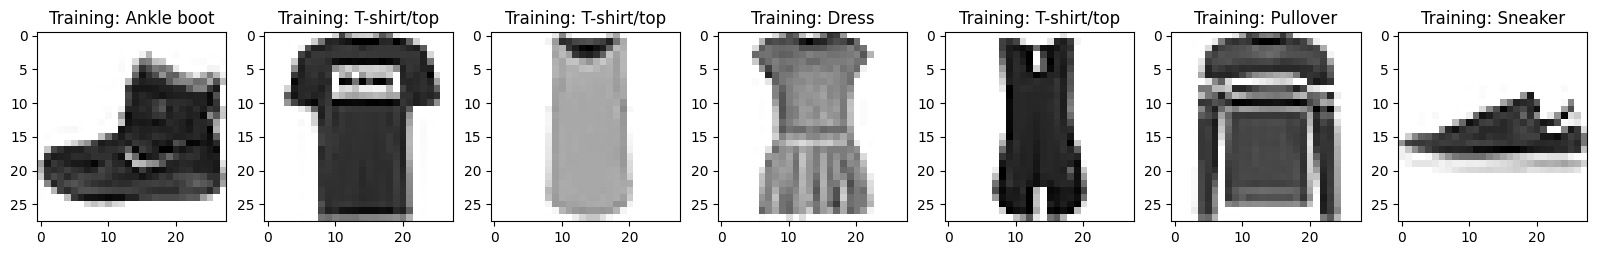

In [103]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

_, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 6))
for ax, image, label in zip(axes, x_train_fashion_raw, y_train_fashion):
    #ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %s" % class_names[label])

Inspeccionemos cuál es la distribución del número de instancias por etiqueta (clase), tanto en el subconjunto de entrenamiento:



In [104]:
unique, counts = np.unique(y_train_fashion, return_counts=True)

print(np.asarray((class_names, counts)).T)


[['T-shirt/top' '6000']
 ['Trouser' '6000']
 ['Pullover' '6000']
 ['Dress' '6000']
 ['Coat' '6000']
 ['Sandal' '6000']
 ['Shirt' '6000']
 ['Sneaker' '6000']
 ['Bag' '6000']
 ['Ankle boot' '6000']]


Como en el subconjunto de evaluación:

In [105]:
unique, counts = np.unique(y_test_fashion, return_counts=True)

print(np.asarray((class_names, counts)).T)

[['T-shirt/top' '1000']
 ['Trouser' '1000']
 ['Pullover' '1000']
 ['Dress' '1000']
 ['Coat' '1000']
 ['Sandal' '1000']
 ['Shirt' '1000']
 ['Sneaker' '1000']
 ['Bag' '1000']
 ['Ankle boot' '1000']]


<br/>
<mark>RECUERDA</mark>
<hr/>

Como se puede apreciar, el conjunto de datos está completamente equilibrado, mostrando el mismo número de ejemplos por clase, lo que como recordaréis, tendrá implicaciones en la evaluación (e.g., la medida *accuracy* es representativa puesto que ninguna clase tiene más peso que otras, a diferencia de un dataset desequilibrado).

### **Entrenamiento del Modelo**

Aquí entrenamos el modelo Random Forest eligiendo el valor deseado de profundidad de los árboles (*max_depth*) y de número de procesos en paralelo (*n_jobs*).

<br/>
<mark>RECUERDA</mark>
<hr/>

*Random Forest* no requiere árboles profundos ya que al ensamblar árboles más simples elimina alguna de sus debilidades construyendo un modelo más robusto y menos sensible a sobreajuste.

Además, puesto que *Random Forest* entrena los diferentes árboles de manera independiente, permite paralelizar dicho entrenamiento mejorando así la eficiencia del proceso de aprendizaje.



In [106]:
max_depth = 2
n_estimators = 10
n_jobs = 5

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=max_depth, random_state=0, n_jobs=n_jobs, n_estimators=n_estimators)
rf_model.fit(x_train_fashion,y_train_fashion)

pred_train = rf_model.predict(x_train_fashion)
pred_test = rf_model.predict(x_test_fashion)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train_fashion, y_train_fashion)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(x_test_fashion, y_test_fashion)))

Precisión sobre los datos de entrenamiento: 56.89
Precisión sobre los datos de test: 56.02


Veámos a continuación algunos ejemplos del conjunto de datos, qué etiqueta ha sido predicha y cuál era su valor real.

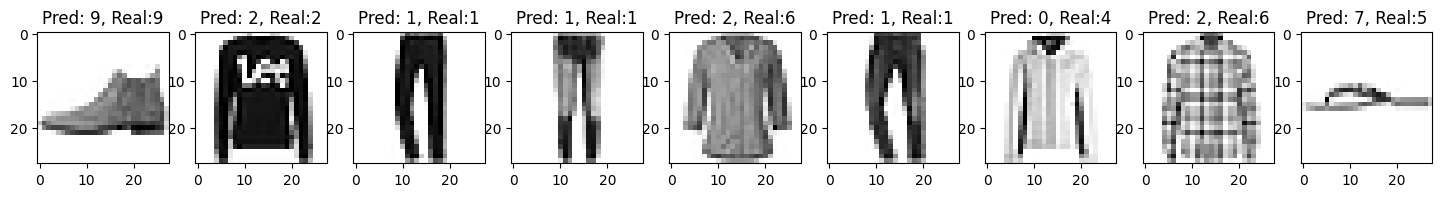

In [107]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, x_test_fashion_raw, pred_test, y_test_fashion):
    #ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

### **Evaluación del modelo**

El primer paso como vimos en el apartado introductorio es la generación de la matriz de confusión, donde graficamos el número de ejemplos que han sido clasificados en cada una de las clases (columnas) y que realmente pertenencían a cada una de las clases (filas). La diagonal nos muestra los aciertos, mientras que del resto podemos obtener los errores por falso positivo y por falso negativo. De aquí, podemos extraer dos cosas:

* Visualmente podemos apreciar cuáles son las clases más fáciles y más difíciles de clasificar, y hacia donde se van los errores. Para entenderlo mejor, busca un caso fuera de la diagonal principal donde el número sea muy elevado. Eso significa que en ese número de casos, el clasificador se equivocó clasificando la case real por la clase predicha, es decir, hay una alta confusión entre esas dos clases, lo que nos puede mostrar hacia donde sesga el clasificador.

* Podemos realizar todos los cálculos para extraer los valores cuantitativos relativos a la precisión, el *recall* y la media armónica *f1* para cada una de las clases, así como sus agregados *micro* y *macro*, como vemos a continuación.

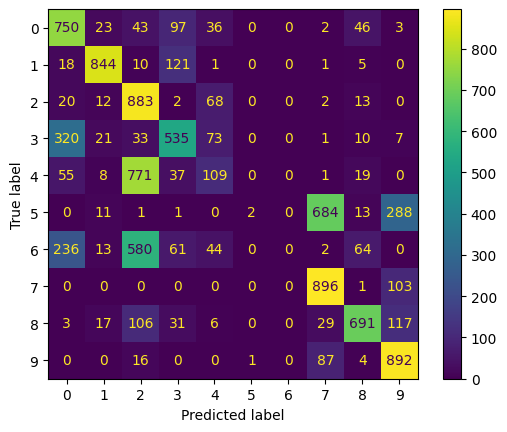

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_fashion, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

A continuación generamos el reporte de evaluación donde se pueden observar las diferentes métricas (*precision*, *recall* y *f1*) por clase, así como sus macro y micro agregados.

In [109]:
from sklearn import metrics

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test_fashion, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=2, n_estimators=10, n_jobs=5, random_state=0):
              precision    recall  f1-score   support

           0       0.53      0.75      0.62      1000
           1       0.89      0.84      0.87      1000
           2       0.36      0.88      0.51      1000
           3       0.60      0.54      0.57      1000
           4       0.32      0.11      0.16      1000
           5       0.67      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.53      0.90      0.66      1000
           8       0.80      0.69      0.74      1000
           9       0.63      0.89      0.74      1000

    accuracy                           0.56     10000
   macro avg       0.53      0.56      0.49     10000
weighted avg       0.53      0.56      0.49     10000




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Inspeccionando los Árboles de Decisión**

Veámos las probabilidades en la predicción de las clases en un árbol de decisión determinado (parámetro *tree_number*):

In [110]:
tree_number= 0

rf_model.estimators_[tree_number].predict_proba(x_test_fashion)[0:len(class_names)-1]

array([[9.02092855e-03, 7.21674284e-04, 6.85590570e-03, 1.59971133e-02,
        2.04474381e-03, 1.37839788e-01, 6.85590570e-03, 5.44864085e-02,
        1.90040895e-01, 5.76136637e-01],
       [1.52195336e-02, 6.73382240e-03, 2.91470492e-01, 1.12777839e-02,
        2.58622577e-01, 1.41793496e-02, 1.97744443e-01, 4.37972189e-04,
        1.89313479e-01, 1.50005475e-02],
       [2.54342320e-01, 2.58413244e-01, 2.65514746e-02, 2.60674869e-01,
        5.86213136e-02, 4.97557445e-03, 1.02587299e-01, 1.80929980e-04,
        3.17532115e-02, 1.89976479e-03],
       [2.54342320e-01, 2.58413244e-01, 2.65514746e-02, 2.60674869e-01,
        5.86213136e-02, 4.97557445e-03, 1.02587299e-01, 1.80929980e-04,
        3.17532115e-02, 1.89976479e-03],
       [2.54342320e-01, 2.58413244e-01, 2.65514746e-02, 2.60674869e-01,
        5.86213136e-02, 4.97557445e-03, 1.02587299e-01, 1.80929980e-04,
        3.17532115e-02, 1.89976479e-03],
       [2.54342320e-01, 2.58413244e-01, 2.65514746e-02, 2.60674869e-01,
   

<br/>
<mark>PREGUNTA</mark>
<hr/>

¿Tiene sentido graficar los árboles de decisión?

Pues considerando que los diferentes árboles de decisión se construyen en función de algunas de las variables del modelo, y que éstas son los píxeles de la imagen, es muy posible que el árbol graficado no tenga demasiado sentido para un humano.

Pero veámoslo en con un ejemplo:

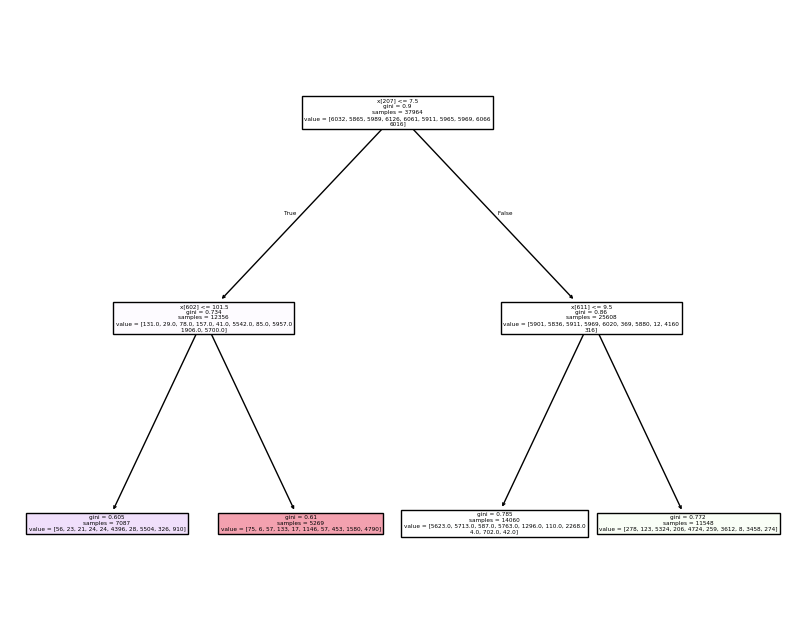

In [111]:
from sklearn.tree import plot_tree, export_graphviz
plt.figure(figsize=(10,8))
plot_tree(rf_model.estimators_[tree_number], filled=True, max_depth=max_depth)
plt.show()

Hagamos algo de zoom:

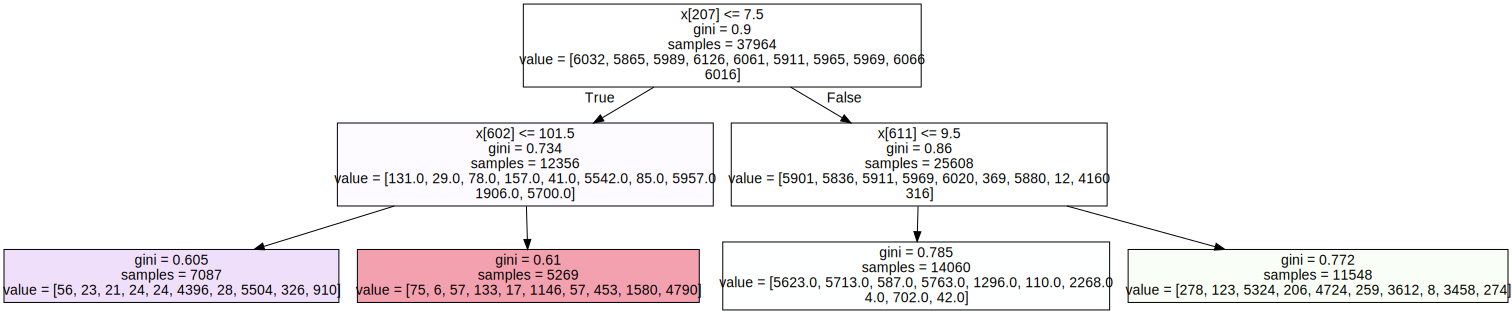

In [112]:
import graphviz
dot_data = export_graphviz(rf_model.estimators_[tree_number], out_file=None,
                                filled=True)
graphviz.Source(dot_data, format="png")

<br/>
<mark>PREGUNTA</mark>
<hr/>

¿Tiene sentido graficar las fronteras de decisión de los árboles, como hicimos en los ejemplos del principio?

Posiblemente, pero hay que considerar que en este caso tenemos 10 clases en lugar de las 2 que graficábamos en los ejemplos del principio. ¿Te atreves a intentarlo?



<br/>
<mark>PREGUNTA</mark>
<hr/>

¿Tiene sentido obtener la importancia de las variables?

De nuevo, las variables descriptoras en este modelo son los diferentes píxeles individuales de la imagen (28 x 28), por lo que no parece que tenga mucho sentido saber qué píxeles individuales tienen más importancia para la clasificación porque seguramente ninguno de ellos, a nivel individual, tengan efecto alguno. Si se pudieran agrupar por zonas, donde los píxeles adquieren importancia por los píxeles de su entorno, sería otra cosa (veremos más adelante en otro tema las Redes Neuronales Convolucionales o *CNN*).


### **Optimización del Modelo**

A continuación, tratemos de optimizar el modelo mediante la búsqueda en grid de sus principales parámetros: la profundidad máxima de los árboles (*max_depth*) y el número de árboles/estimadores (*n_estimators*). Si quieres experimentar, puedes hacerlo también incluyendo el número/porcentaje de ejemplos utilizados para entrenar cada árbol (*max_samples*) o el número de variables utilizadas (*max_features*).

Empezamos iterando por profundidad de los árboles, dado un número concreto de estimadores.

In [113]:
n_jobs = 5

n_estimators = 10

minDepth = 1
maxDepth = 30
hop = 4

md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(minDepth,maxDepth,hop)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=maxdepth, n_jobs=n_jobs, n_estimators=n_estimators)
  rf_model.fit(x_train_fashion, y_train_fashion)

  md_list.append(maxdepth)
  score_train_list.append(100.0*rf_model.score(x_train_fashion, y_train_fashion))
  score_test_list.append(100.0*rf_model.score(x_test_fashion, y_test_fashion))

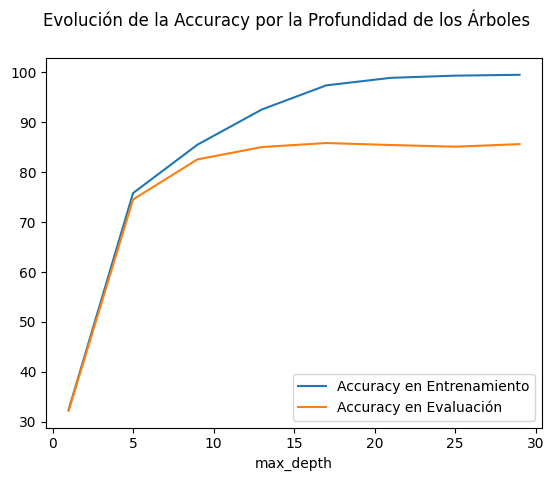

In [114]:
df = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Accuracy en Entrenamiento")
df["score_test"].plot(label="Accuracy en Evaluación")
plt.suptitle("Evolución de la Accuracy por la Profundidad de los Árboles")
plt.legend()
plt.show();

<br/>
<mark>PREGUNTA</mark>
<hr/>

¿Cuál es la profundidad óptima dada la gráfica anterior?

Pista, aquella que obtiene los resultados más elevados con la menor diferencia posible entre entrenamiento y evaluación (modelo menos sobreajustado).

Repetimos el experimento, iterando esta vez por el número de estimadores (dada una profundidad máxima):

In [115]:
n_jobs = 5

max_depth = 5

minEstimators = 10
maxEstimators = 100
hop = 10

md_list = []
score_train_list = []
score_test_list = []

for n_estimators in list(range(minEstimators,maxEstimators,hop)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=max_depth, n_jobs=n_jobs, n_estimators=n_estimators)
  rf_model.fit(x_train_fashion, y_train_fashion)

  ## Generación de listas
  md_list.append(n_estimators)
  score_train_list.append(100.0*rf_model.score(x_train_fashion, y_train_fashion))
  score_test_list.append(100.0*rf_model.score(x_test_fashion, y_test_fashion))

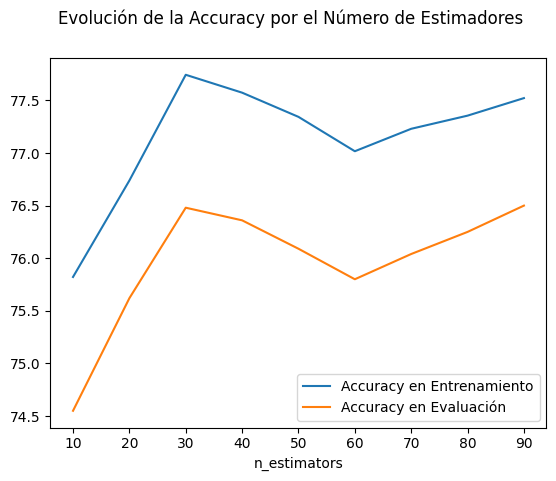

In [116]:
df = pd.DataFrame({"n_estimators":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df.set_index("n_estimators", inplace=True)
df["score_train"].plot(label="Accuracy en Entrenamiento")
df["score_test"].plot(label="Accuracy en Evaluación")
plt.suptitle("Evolución de la Accuracy por el Número de Estimadores")
plt.legend()
plt.show();

<br/>
<mark>PREGUNTA</mark>
<hr/>

¿Cuál es el número óptimo de estimadores dada la gráfica anterior?

De nuevo, aquel que obtiene los resultados más elevados con la menor diferencia posible entre entrenamiento y evaluación (modelo menos sobreajustado).

Combinemos ambos parámetros en un mismo clasificador y veámos si mejora el rendimiento de los anteriores (podría ser interesante una búsqueda grid donde se combinen ambas variables, aunque podría consumir bastante tiempo. Se deja a elección del alumno y se le anima a que lo realice):

In [117]:
max_depth = 5
n_estimators = 30

rf_model_optimo = RandomForestClassifier(max_depth=max_depth, random_state=0, n_jobs=n_jobs, n_estimators=n_estimators)
rf_model_optimo.fit(x_train_fashion,y_train_fashion)

pred_train = rf_model_optimo.predict(x_train_fashion)
pred_test = rf_model_optimo.predict(x_test_fashion)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train_fashion, y_train_fashion)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(x_test_fashion, y_test_fashion)))

Precisión sobre los datos de entrenamiento: 77.52
Precisión sobre los datos de test: 76.50


Generamos la matriz de confusión para visualmente observar dónde se producen los errores y poder calcular el reporte de clasificación:

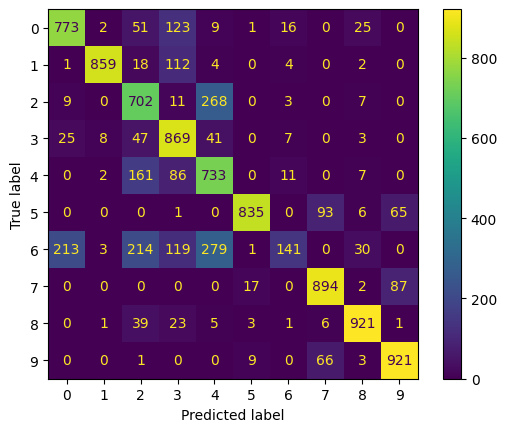

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_fashion, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

A continuación generamos el reporte de evaluación donde se pueden observar las diferentes métricas (*precision*, *recall* y *f1*) por clase, así como sus macro y micro agregados.

In [119]:
print(f"Classification report for classifier {rf_model_optimo}:\n"
      f"{metrics.classification_report(y_test_fashion, pred_test)}\n")

Classification report for classifier RandomForestClassifier(max_depth=5, n_estimators=30, n_jobs=5, random_state=0):
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1000
           1       0.98      0.86      0.92      1000
           2       0.57      0.70      0.63      1000
           3       0.65      0.87      0.74      1000
           4       0.55      0.73      0.63      1000
           5       0.96      0.83      0.89      1000
           6       0.77      0.14      0.24      1000
           7       0.84      0.89      0.87      1000
           8       0.92      0.92      0.92      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.76     10000
   macro avg       0.79      0.76      0.75     10000
weighted avg       0.79      0.76      0.75     10000




# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> Random Forest </center> </strong> </h1> </p>
<hr>
<br>

* Los métodos de ensamblaje **combinan las predicciones de varios modelos base** para obtener una predicción final más **precisa** y **robusta**, reduciendo la varianza y el sobreajuste, resultando en modelos **más generalizables**.

* *Random Forest* es un **método de ensamblaje** que combina múltiples árboles de decisión entrenados en muestras ***bootstrap*** del conjunto de datos.

* Introduce **aleatoriedad** en la selección de características y la división de nodos durante la construcción de los árboles, lo que aumenta la diversificación y reduce la correlación entre los árboles.

* Las predicciones finales se obtienen mediante la **votación** (en problemas de clasificación) o el **promedio** (en problemas de regresión) de las predicciones de los árboles individuales.

* Es **robusto** ante datos ruidosos y sobreajuste, y puede manejar datos faltantes. Además, es paralelizable, lo que lo hace **escalable** para grandes conjuntos de datos.

* Puede proporcionar una estimación de la importancia relativa de las características en la predicción del modelo, lo que puede ayudar en la **interpretación** y análisis de los resultados.


* Es un algoritmo de aprendizaje automático **versátil** y **ampliamente utilizado** que tiene numerosas aplicaciones en diferentes áreas como la **clasificación de correo spam**, **predecir el precio** de una vivienda, **detección de fraudes**, la **selección de características**, **imputar valores faltantes**, la **clasificación de imágenes**, la **detección de objetos**, la **clasificación de enfermedades**, la **identificación de genes** o proteínas relevantes en el análisis de datos biológicos, entre otras muchas.

* Las bibliotecas populares para la construcción de árboles de decisión incluyen ***Scikit-Learn*** (***RandomForestClassifier*** y ***RandomForestRegressor***) en ***Python***, ***randomForest*** en ***R***, o librerías y plataformas como ***XGBoost***, ***LightGBM*** o ***H2O***.